In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

!pip install squarify
import squarify

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df1 = pd.read_csv(r"/content/OnlineRetail.csv",encoding="ISO-8859-1")

In [3]:
df1.shape

(541909, 8)

In [4]:
df1['InvoiceDate']= pd.to_datetime(df1['InvoiceDate'])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [7]:
print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))
print("")

Missing Frequency: 

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64 

Missing Proportion: 

CustomerID    0.25
Description   0.00
InvoiceNo     0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
UnitPrice     0.00
Country       0.00
dtype: float64



In [8]:
# Remove Missing Values
df1.dropna(inplace = True)

In [9]:
df1.Country.value_counts().reset_index()#.head(20)

,index,Country
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1480
9,Australia,1259


In [10]:
df1.CustomerID.unique().shape

(4372,)

In [11]:
df1.Quantity.describe()

count   406829.00
mean        12.06
std        248.69
min     -80995.00
25%          2.00
50%          5.00
75%         12.00
max      80995.00
Name: Quantity, dtype: float64

In [12]:
df1['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [13]:
df1.groupby(['UnitPrice', 'Country']).size().groupby(level=1).max()

Country
Australia                 133
Austria                    46
Bahrain                     4
Belgium                   190
Brazil                      6
Canada                     26
Channel Islands            72
Cyprus                     81
Czech Republic              3
Denmark                    42
EIRE                      688
European Community         11
Finland                    45
France                   1030
Germany                  1025
Greece                     20
Iceland                    24
Israel                     30
Italy                      68
Japan                      34
Lebanon                     4
Lithuania                  10
Malta                      18
Netherlands               264
Norway                    131
Poland                     47
Portugal                  189
RSA                         6
Saudi Arabia                4
Singapore                  23
Spain                     280
Sweden                     47
Switzerland               197
US

In [14]:
df1.groupby(['Quantity', 'Country']).size().groupby(level=1).max()

Country
Australia                 119
Austria                   122
Bahrain                     7
Belgium                   509
Brazil                      8
Canada                     43
Channel Islands           193
Cyprus                    111
Czech Republic             12
Denmark                   123
EIRE                     1798
European Community         19
Finland                   157
France                   2092
Germany                  2490
Greece                     46
Iceland                    56
Israel                     51
Italy                     200
Japan                      52
Lebanon                    17
Lithuania                   9
Malta                      25
Netherlands               225
Norway                    273
Poland                     99
Portugal                  329
RSA                        11
Saudi Arabia                5
Singapore                  49
Spain                     549
Sweden                     65
Switzerland               485
US

In [15]:
df1.groupby(['CustomerID', 'Country']).size().groupby(level=1).max()

Country
Australia                778
Austria                  129
Bahrain                   13
Belgium                  274
Brazil                    32
Canada                   135
Channel Islands          366
Cyprus                   254
Czech Republic            30
Denmark                  108
EIRE                    5903
European Community        61
Finland                  300
France                   646
Germany                  531
Greece                    56
Iceland                  182
Israel                   171
Italy                    126
Japan                    230
Lebanon                   45
Lithuania                 35
Malta                     82
Netherlands             2085
Norway                   420
Poland                   159
Portugal                 377
RSA                       58
Saudi Arabia              10
Singapore                229
Spain                    481
Sweden                   201
Switzerland              355
USA                      202
United

In [16]:
gk = df1.groupby('Country')

In [17]:
gk.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.00
Austria,C538971,22153,ANGEL DECORATION STARS ON DRESS,-48,2010-12-15 11:39:00,0.42,12865.00
Bahrain,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,2011-05-09 13:49:00,1.25,12355.00
Belgium,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12,2010-12-03 16:35:00,2.10,12395.00
Brazil,550201,22423,REGENCY CAKESTAND 3 TIER,16,2011-04-15 10:25:00,10.95,12769.00
Canada,546533,20886,BOX OF 9 PEBBLE CANDLES,12,2011-03-14 13:53:00,1.95,15388.00
Channel Islands,538002,22690,DOORMAT HOME SWEET HOME BLUE,2,2010-12-09 11:48:00,7.95,14932.00
Cyprus,538826,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-14 12:58:00,2.55,12370.00
Czech Republic,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2011-02-28 08:43:00,2.55,12781.00


In [18]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,406829.00,12.06,248.69,-80995.00,-2.00,1.00,1.00,1.00,5.00,24.00,36.00,120.00,80995.00
UnitPrice,406829.00,3.46,69.32,0.00,0.21,0.42,0.55,0.85,1.95,6.75,8.50,15.00,38970.00
CustomerID,406829.00,15287.69,1713.60,12346.00,12415.00,12626.00,12876.00,13536.00,15152.00,17719.00,17905.00,18212.00,18287.00


In [19]:
df1 = df1[~df1["InvoiceNo"].str.contains("C", na = False)]

In [20]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,397924.00,13.02,180.42,1.00,1.00,1.00,1.00,2.00,6.00,24.00,36.00,120.00,80995.00
UnitPrice,397924.00,3.12,22.10,0.00,0.21,0.42,0.55,0.85,1.95,6.35,8.50,14.95,8142.75
CustomerID,397924.00,15294.32,1713.17,12346.00,12415.00,12627.00,12883.00,13552.00,15159.00,17725.00,17912.00,18211.00,18287.00


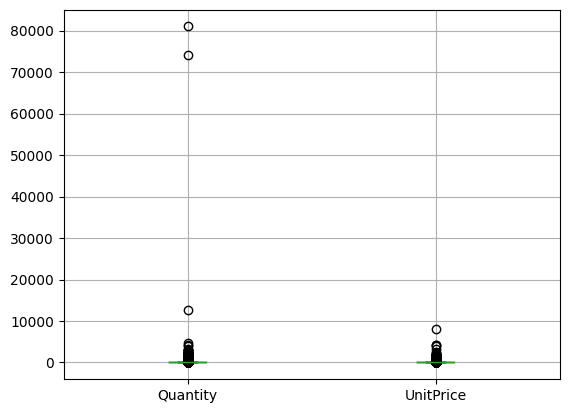

In [21]:
df1[["Quantity", "UnitPrice"]].boxplot();

In [22]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())

2009-2010: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [23]:
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)

recency1.head()

,Recency
CustomerID,
12346.00,-41
12347.00,-364
12348.00,-291
12349.00,-348
12350.00,-56


In [24]:
freq1 = df1.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq1

,Frequency
CustomerID,
12346.00,1
12347.00,7
12348.00,4
12349.00,1
12350.00,1
...,...
18280.00,1
18281.00,1
18282.00,2


In [25]:
df1["TotalPrice"] = df1["Quantity"] * df1["UnitPrice"]

monetary1 = df1.groupby("CustomerID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary1.head()

,Monetary
CustomerID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [26]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)

rfm1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,-41,1,77183.60
12347.00,-364,7,4310.00
12348.00,-291,4,1797.24
12349.00,-348,1,1757.55
12350.00,-56,1,334.40


In [27]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.00,-41,1,77183.60,1,1,5
12347.00,-364,7,4310.00,5,5,5
12348.00,-291,4,1797.24,2,4,4
12349.00,-348,1,1757.55,4,1,4
12350.00,-56,1,334.40,1,1,2


In [28]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) +
                     rfm1['FrequencyScore'].astype(str) +
                     rfm1['MonetaryScore'].astype(str))


rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.00,-41,1,77183.60,1,1,5,115
12347.00,-364,7,4310.00,5,5,5,555
12348.00,-291,4,1797.24,2,4,4,244
12349.00,-348,1,1757.55,4,1,4,414
12350.00,-56,1,334.40,1,1,2,112


In [29]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.00,-41,1,77183.60,1,1,5,115,Hibernating
12347.00,-364,7,4310.00,5,5,5,555,Champions
12348.00,-291,4,1797.24,2,4,4,244,At Risk
12349.00,-348,1,1757.55,4,1,4,414,Promising
12350.00,-56,1,334.40,1,1,2,112,Hibernating


In [30]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,-313.63,-314.00,353,10.97,1.16,1.00,353,0.37,472.55,331.95,353,532.93
At Risk,-212.96,-228.00,594,68.64,2.87,3.00,594,0.94,1079.81,675.16,594,2559.61
Can't Loose,-234.95,-260.00,64,65.15,8.31,7.00,64,4.14,2791.01,2236.74,64,2074.24
Champions,-360.63,-362.00,632,3.68,12.34,8.00,632,16.37,6866.75,2613.85,632,20354.67
Hibernating,-149.34,-148.00,1069,92.04,1.10,1.00,1069,0.30,488.86,293.00,1069,2421.94
Loyal Customers,-333.31,-337.00,820,15.60,6.44,5.00,820,4.45,2862.89,1737.83,820,6003.49
Need Attention,-314.73,-315.00,184,11.53,2.32,2.00,184,0.47,894.49,637.77,184,1110.27
New Customers,-359.57,-359.00,42,3.90,1.00,1.00,42,0.00,388.21,274.50,42,570.78
Potential Loyalists,-349.63,-349.00,486,9.34,2.01,2.00,486,0.65,1041.34,524.00,486,7640.53


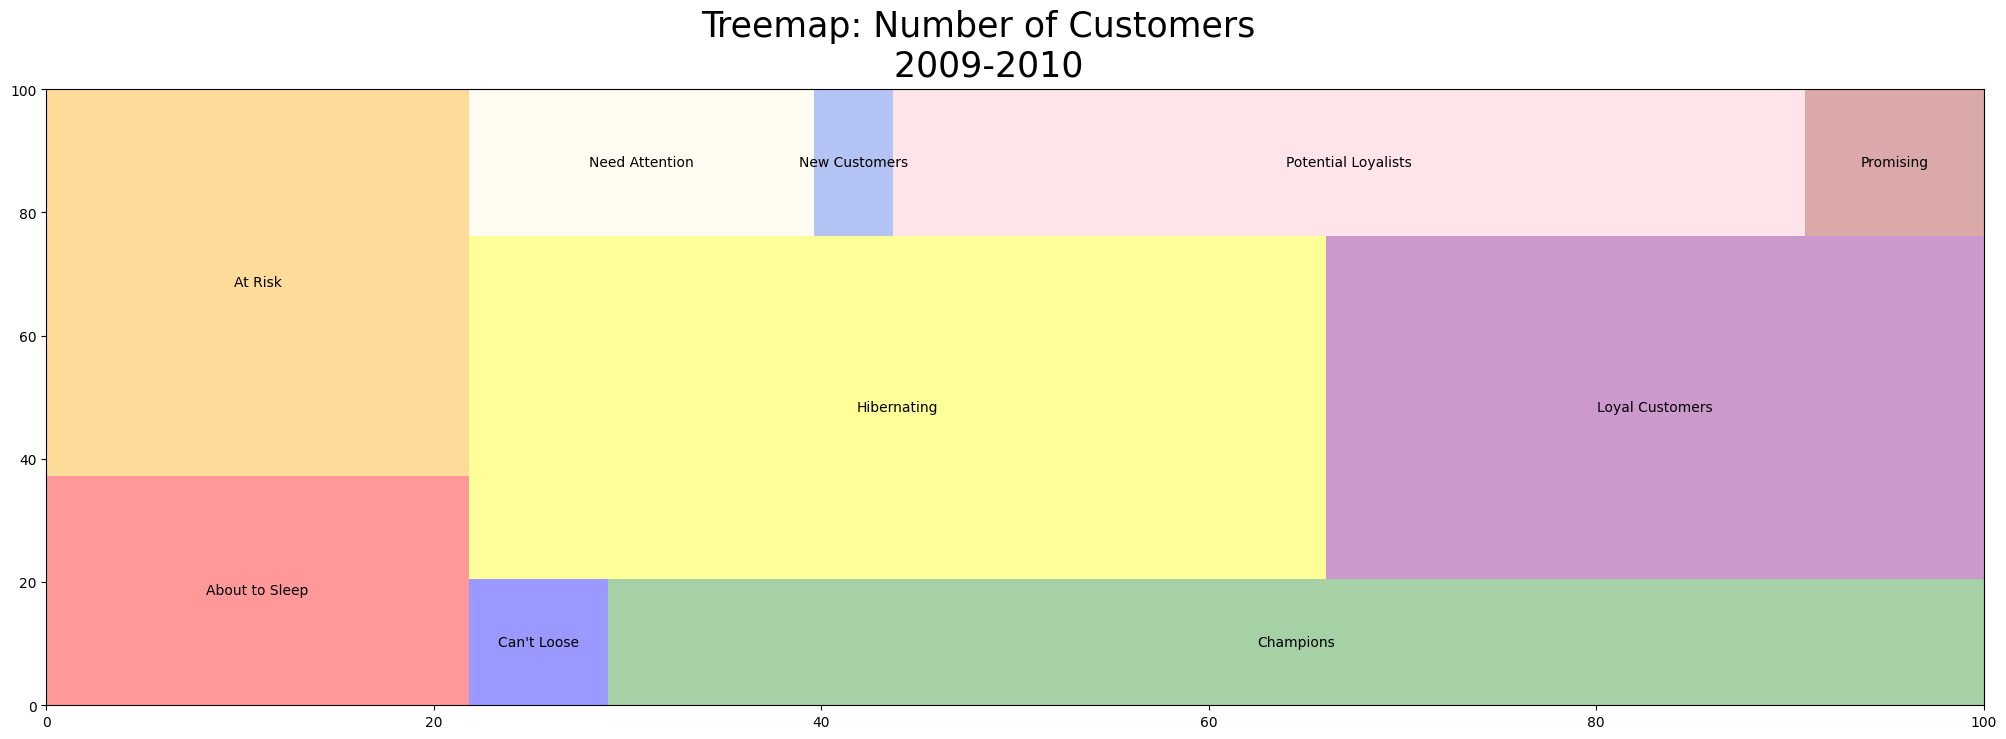

In [31]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);
